
<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:RoyalBlue">Assignment: 2 </span> </h1>
<hr>
<h3 style="font-size:42px; text-align:left; margin-bottom:30px;"><span style="color:LightGrey">Name:</span> Maxwell Zhang</h3>

<h3 style="font-size:42px; text-align:left; margin-bottom:30px;"><span style="color:LightGrey">Email:</span> jiangyun.zhang@duke.edu</h3>







<br><hr id="toc">

### Overview...

As you go through the analytic steps, capture the key elements here and use the example table of contents to give the read access to the big idea:
1. [Prepare the problem](#prepare)
2. [Summarize the dataset](#summarize)
3. [Prepare the data](#datarep)
4. [Evaluate the model](#modeleval)
5. [Improve model accuracy](#improve)
6. [Finalize the model](#finalize)


This time, however, you'll be in the driver's seat.
<br><hr>


<span id="prepare"></span>
# 1. Prepare Problem


In [1]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


## a) Load libraries


In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

## b) Load dataset

In [3]:
df = pd.read_csv('analytic_dataset.csv')
df_test = pd.read_csv('analytic_dataset_test.csv')

In [49]:
df_test = df_test.drop('SalePrice',axis = 1)

<span id="modeleval"></span>
# 4. Evaluate Algorithms


In [4]:
df.dtypes

LotArea                    int64
OverallCond                int64
YearRemodAdd               int64
BsmtUnfSF                float64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath             float64
BsmtHalfBath             float64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageCars               float64
GarageArea               float64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPorch              int64
3SsnPorch                  int64
ScreenPorch                int64
PoolArea                   int64
MiscVal                    int64
MoSold                     int64
YrSold                     int64
SalePrice                  int64
big_house                  int64
          

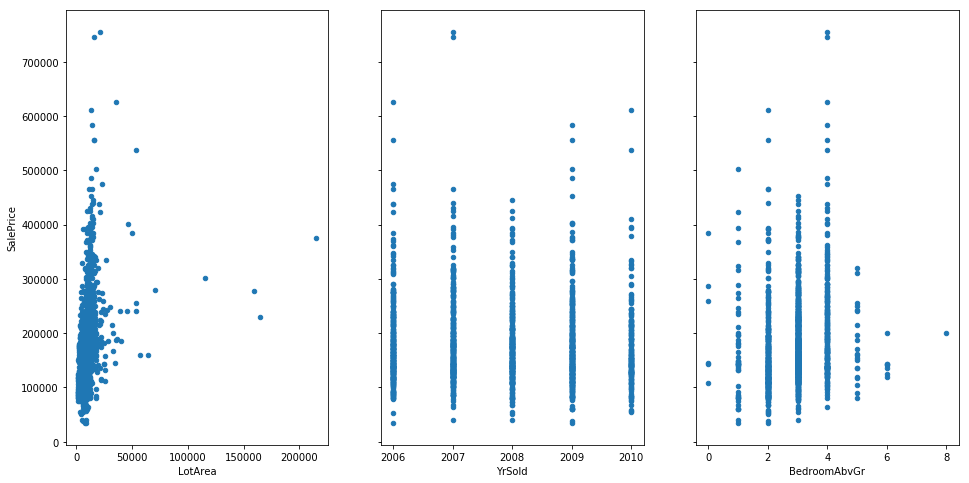

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='LotArea', y='SalePrice', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='YrSold', y='SalePrice', ax=axs[1])
df.plot(kind='scatter', x='BedroomAbvGr', y='SalePrice', ax=axs[2])

In [175]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='SalePrice ~ LotArea', data=df).fit()

# print the coefficients
lm.params

Intercept    158836.151897
LotArea           2.099972
dtype: float64

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

In [176]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'LotArea': [df.LotArea.min(), df.LotArea.max()]})
X_new.head()

,LotArea
0,1300
1,215245


In [177]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0    161566.115434
1    610844.614642
dtype: float64

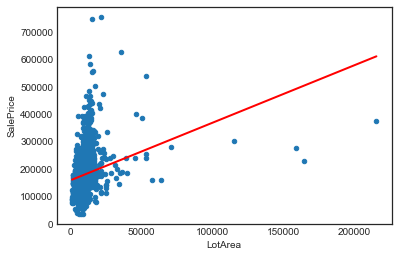

In [178]:
# first, plot the observed data
df.plot(kind='scatter', x='LotArea', y='SalePrice')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [179]:
# print the R-squared value for the model
lm.rsquared

0.069613315382111907

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient

In [181]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='SalePrice ~ LotArea + YrSold + BedroomAbvGr', data=df).fit()

# print the coefficients
lm.params

Intercept       2.575745e+06
LotArea         1.966277e+00
YrSold         -1.222223e+03
BedroomAbvGr    1.342987e+04
dtype: float64

In [182]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     47.40
Date:                Thu, 05 Apr 2018   Prob (F-statistic):           3.17e-29
Time:                        00:30:33   Log-Likelihood:                -18476.
No. Observations:                1460   AIC:                         3.696e+04
Df Residuals:                    1456   BIC:                         3.698e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.576e+06   3.01e+06      0.857      0.392   -3.32e+06    8.47e+06
LotArea          1.9663      0.201      9.805      0.000       1.573       2.360
YrSold       -1222.2231   1497.314     -0.816      0.414   -4159.347    1714.901
BedroomAbvGr  1.343e+04   2455.044      5.470      0.000    8614.065    1.82e+04
==============================================================================
Omnibus:                      597.856   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3369.704
Skew:                           1.833   Prob(JB):                         0.00
Kurtosis:                       9.477   Cond. No.                     2.21e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## a) Split-out validation dataset


In [8]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split # Scikit-Learn 0.18+

In [9]:
# Create separate object for target variable
y = df.SalePrice

# Create separate object for input features
X = df.drop('SalePrice', axis=1)

## Train/ Test Split

**First, split <code style="color:steelblue">X</code> and <code style="color:steelblue">y</code> into training and test sets using the <code style="color:steelblue">train_test_split()</code> function.** 
* **Tip:** Its first two arguments should be X and y.
* **Pass in the argument <code style="color:steelblue">test_size=<span style="color:crimson">0.2</span></code> to set aside 20% of our observations for the test set.**
* **Pass in <code style="color:steelblue">random_state=<span style="color:crimson">1234</span></code> to set the random state for replicable results.**
* You can read more about this function in the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">documentation</a>.

The function returns a tuple with 4 elements: <code style="color:steelblue">(X_train, X_test, y_train, y_test)</code>. Remember, you can **unpack** it. We've given you a head-start below with the code to unpack the tuple:

In [10]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

In [11]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1168 292 1168 292


In [12]:
# Summary statistics of X_train
X_train.describe()

,LotArea,OverallCond,YearRemodAdd,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,big_house,during_recession,property_age,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_Other,MSZoning_C (all),MSZoning_FV,MSZoning_Missing,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,...,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Missing,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Missing,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,10492.053938,5.584760,1984.919521,568.521404,1167.212329,346.873288,5.740582,1519.826199,0.424658,0.056507,1.571918,0.377568,2.866438,1.046233,6.536815,0.607021,1978.873023,1.775685,479.077911,96.904110,47.460616,22.054795,3.927226,15.606164,2.32363,49.720890,6.268836,2007.801370,0.071062,0.061644,13.559932,0.369007,0.041096,0.104452,0.202055,0.041952,0.040240,0.035103,0.059932,0.042808,0.063356,0.006849,0.044521,0.0,0.011130,0.785103,0.152397,0.005137,0.994863,0.332192,...,0.008562,0.002568,0.022260,0.022260,0.0,0.010274,0.000856,0.933219,0.004281,0.598459,0.011130,0.053938,0.007705,0.273973,0.050514,0.235445,0.050514,0.296233,0.417808,0.002568,0.036815,0.010274,0.050514,0.002568,0.897260,0.001712,0.025685,0.005993,0.050514,0.005137,0.910959,0.059932,0.021404,0.918664,0.032534,0.001712,0.001712,0.003425,0.003425,0.002568,0.0,0.079623,0.002568,0.872432,0.068493,0.002568,0.008562,0.011986,0.827911,0.080479
std,9137.170898,1.129798,20.544191,447.020081,391.374673,436.087964,48.321194,533.407736,0.514877,0.238300,0.549175,0.500636,0.812902,0.218084,1.629951,0.641751,23.789450,0.741261,216.575370,128.519082,66.805914,62.461604,31.702949,57.383098,35.65434,552.275673,2.710794,1.318226,0.257038,0.240611,24.487896,0.482742,0.198597,0.305977,0.401705,0.200566,0.196605,0.184118,0.237462,0.202511,0.243707,0.082512,0.206337,0.0,0.104956,0.410927,0.359559,0.071519,

In [13]:
# Standardize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()

In [14]:
# Summary statistics of X_train_new
X_train_new.describe()

,LotArea,OverallCond,YearRemodAdd,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,big_house,during_recession,property_age,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_Other,MSZoning_C (all),MSZoning_FV,MSZoning_Missing,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,...,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Missing,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Missing,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,0.0,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,...,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,0.0,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,0.0,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03
mean,8.317167e-19,-1.503744e-16,-1.658871e-15,-7.680310e-17,-2.541726e-16,1.193870e-16,-2.012754e-17,-7.694568e-17,-9.695441e-18,1.024200e-16,8.535790e-17,-1.756586e-16,1.370669e-16,-3.486081e-16,1.831678e-16,-1.056993e-16,-4.977715e-14,2.301717e-16,-4.895247e-17,3.155771e-17,1.416057e-16,1.270863e-16,-4.968913e-17,-2.205238e-17,7.201479e-16,-1.607114e-16,3.593016e-17,4.950397e-14,-3.391503e-16,2.282231e-16,3.095887e-16,-2.285082e-16,1.364491e-16,4.050223e-16,4.087294e-17,1.054284e-15,-1.533686e-16,-4.260291e-16,-3.710882e-16,-2.665771e-16,3.194743e-16,-9.182153e-17,-7.913191e-17,NaN,5.135257e-17,1.916275e-16,-1.534161e-16,3.757459e-16,-1.077786e-15,-7.090979e-17,...,3.726329e-16,4.272410e-16,-2.460456e-16,-5.760232e-17,NaN,1.097391e-16,-1.927622e-16,-3.440931e-17,-3.475388e-16,3.995092e-16,2.520102e-16,-1.519428e-16,-2.412216e-16,-6.625218e-17,-8.464500e-17,-1.463821e-17,-8.464500e-17,1.501843e-16,-9.476818e-17,4.633969e-16,1.509447e-16,-6.207221e-16,-8.464500e-17,3.188802e-16,-4.026460e-16,1.183058e-16,1.557449e-16,3.023409e-16,-8.464500e-17,-1.670800e-16,-2.394394e-16,1.662483e-16,6.030184e-16,-2.538875e-16,-4.610087e-18,-6.744035e-17,-1.008516e-16,1.847956e-16,8.287463e-17,5.110899e-16,NaN,-2.824985e-16,3.239061e-16,1.577885e-16,9.267701e-17,4.502677e-16,2.548142e-16

## b) Test options and evaluation metric


In [15]:
## Function for creating model pipelines
from sklearn.pipeline import make_pipeline

In [16]:
# For standardization
from sklearn.preprocessing import StandardScaler

Next, create a <code style="color:steelblue">pipelines</code> dictionary.
* It should include 3 keys: <code style="color:crimson">'lasso'</code>, <code style="color:crimson">'ridge'</code>, and <code style="color:crimson">'enet'</code>
* The corresponding values should be pipelines that first standardize the data.
* For the algorithm in each pipeline, set <code style="color:steelblue">random_state=<span style="color:crimson">123</span></code> to ensure replicable results.

In [17]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [18]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)) ,
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123)) ,
}

## Pipelines

**Add pipelines for <code style="color:SteelBlue">RandomForestRegressor</code> and <code style="color:SteelBlue">GradientBoostingRegressor</code> to your pipeline dictionary.**
* Name them <code style="color:crimson">'rf'</code> for random forest and <code style="color:crimson">'gb'</code> for gradient boosted tree.
* Both pipelines should standardize the data first.
* For both, set <code style="color:steelblue">random_state=<span style="color:crimson">123</span></code> to ensure replicable results.

In [19]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


## c) Spot Check Algorithms



In [20]:
# List tuneable hyperparameters of our Lasso pipeline
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))]}

In [21]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

In [22]:
# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

In [23]:
#  Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

In [24]:
# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [25]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

Now that we have all of our hyperparameters declared, let's store them in a dictionary for ease of access.

<br>
**Create a <code style="color:steelblue">hyperparameters</code> dictionary**.
* Use the same keys as in the <code style="color:steelblue">pipelines</code> dictionary.
    * If you forgot what those keys were, you can insert a new code cell and call <code style="color:steelblue">pipelines.keys()</code> for a reminder.
* Set the values to the corresponding **hyperparameter grids** we've been declaring throughout this module.
    * e.g. <code style="color:steelblue"><span style="color:crimson">'rf'</span> : rf_hyperparameters</code>
    * e.g. <code style="color:steelblue"><span style="color:crimson">'lasso'</span> : lasso_hyperparameters</code>

In [26]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


## d) Compare Algorithms

In [27]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

In [28]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [29]:
# Column datatypes
X_train.dtypes

LotArea                    int64
OverallCond                int64
YearRemodAdd               int64
BsmtUnfSF                float64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath             float64
BsmtHalfBath             float64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageCars               float64
GarageArea               float64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPorch              int64
3SsnPorch                  int64
ScreenPorch                int64
PoolArea                   int64
MiscVal                    int64
MoSold                     int64
YrSold                     int64
big_house                  int64
during_recession           int64
          

<span id="improve"></span>
# 5. Improve Accuracy



## a) Algorithm Tuning



In [30]:
import warnings
warnings.simplefilter("ignore", UserWarning)
# Fit and tune model
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
import warnings
warnings.simplefilter("ignore", UserWarning)

# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [32]:
pipelines.items

<function dict.items>

## b) Ensembles



In [33]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [34]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


## Select Model

In [35]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.8309115196267903
ridge 0.8329136055052966
enet 0.8522955091264514
rf 0.8586218667110086
gb 0.8733340442396287


In [36]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

<span id="finalize"></span>
# 6. Finalize Model



In [37]:
# Display fitted GradientBoostingRegressor object
fitted_models['gb']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, mi...rs=100, presort='auto', random_state=123,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'gradientboostingregressor__n_estimators': [100, 200], 'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2], 'gradientboostingregressor__max_depth': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## a) Predictions on validation dataset



In [38]:
# Predict test set using fitted GradientBoostingRegressor
pred = fitted_models['gb'].predict(X_test)

In [39]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred ))
print( 'MAE:', mean_absolute_error(y_test, pred))

R^2: 0.8953205612264299
MAE: 14823.494045235326


In [40]:
# print the performance of each model in fitted_models on the test set.
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.8788604335758672
MAE: 18139.632783995163

ridge
--------
R^2: 0.8785134393531357
MAE: 18194.57142352091

enet
--------
R^2: 0.8791665656341836
MAE: 18170.42517303375

rf
--------
R^2: 0.8661365391235998
MAE: 17206.46851027397

gb
--------
R^2: 0.8953205612264299
MAE: 14823.494045235326



**Next, ask yourself these questions to pick the winning model:**
* Which model had the highest $R^2$ on the test set?

> Gradient Boosting

* Which model had the lowest mean absolute error?

> Gradient Boosting

* Are these two models the same one?

> Yes

* Did it also have the best holdout $R^2$ score from cross-validation?

> Yes

* **Does it satisfy our win condition?**

> It depends, what was your apriori goal for mean absolute error (we are less than \$100,000!)

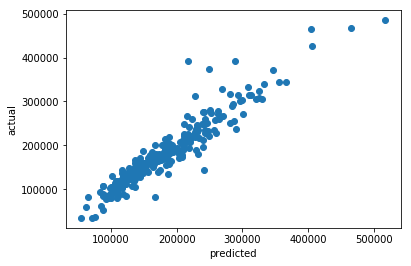

In [41]:
gb_pred = fitted_models['gb'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## b) Create standalone model on entire training dataset


In [51]:
gb_pred = fitted_models['gb'].predict(df_test)
gb_pred

array([127949.33185072, 163897.90557632, 195703.93703613, ...,
       146788.01458973, 121789.46320344, 243672.24787989])

In [46]:
X_test.shape

(292, 266)

In [65]:
Id = pd.read_csv('test.csv')
Id['SalePrice'] = gb_pred

In [72]:
Result = Id[['Id','SalePrice']]

In [73]:
Result.to_csv('Submission.csv',index=False)

## c) Save model for later use

In [207]:
type(fitted_models['gb'])

sklearn.model_selection._search.GridSearchCV

In [208]:
type(fitted_models['gb'].best_estimator_)

sklearn.pipeline.Pipeline

In [209]:
fitted_models['gb'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, m...rs=100, presort='auto', random_state=123,
             subsample=1.0, verbose=0, warm_start=False))])

In [210]:
import pickle

In [212]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

In [224]:
!jupyter nbconvert --to=python Maxwell_Zhang.ipynb


[NbConvertApp] Converting notebook Maxwell_Zhang.ipynb to python
[NbConvertApp] Writing 19477 bytes to Maxwell_Zhang.py
